# Intro to coffea.hist

A histogram in Coffea is a `N-D` collection of different categories, along with bin(s)

Let's start by importing some necessary libraries

In [1]:
from coffea import hist
import matplotlib.pyplot as plt #plot histograms
import numpy as np

Simple example from the Coffea manual

In [2]:
h = hist.Hist("Observed bird count",
               hist.Cat("species", "Bird species"),
               hist.Bin("x", "x coordinate [m]", 20, -5, 5),
               hist.Bin("y", "y coordinate [m]", 20, -5, 5),
             )

Now we'ss use `fill()` to add 10 `ducks`, with random `x-y` values using `numpy.random`, each with a weight of 3

In [3]:
h.fill(species='ducks', x=np.random.normal(size=10), y=np.random.normal(size=10), weight=np.ones(10) * 3)

Now I'll add another species

In [4]:
h.fill(species='phoenix', x=np.random.normal(size=1), y=np.random.normal(size=1), weight=np.ones(1))

Let's create a plot to draw everthing in using matplotlib and the `plot2d()` method in `coffea.hist`

In [5]:
h.integrate('species')

<Hist (x,y) instance at 0x7f6a1425fd30>

<AxesSubplot:xlabel='x coordinate [m]', ylabel='y coordinate [m]'>

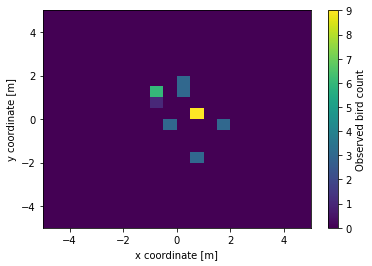

In [6]:
hist.plot2d(h.integrate('species'), xaxis='x')

Now we can play with the axes to learn some more<br>
We can view the axes with `h.axes()`

In [7]:
h.axes()

(<Cat (name=species) instance at 0x7f69ebd46d30>,
 <Bin (name=x) instance at 0x7f6a14265820>,
 <Bin (name=y) instance at 0x7f6a14265c70>)

We can remove the `x`-axis by integrating it out with `integrate()`

In [8]:
h.integrate('x').integrate('species')

<Hist (y) instance at 0x7f69e3b38f10>

And now we can make a `1D` plot, in this case of `species` and `y coordinate`

<AxesSubplot:xlabel='y coordinate [m]', ylabel='Observed bird count'>

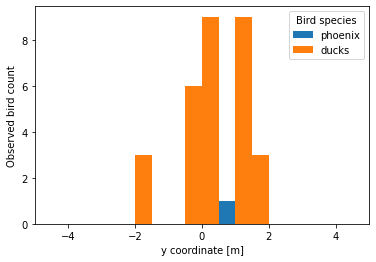

In [9]:
hist.plot1d(h.integrate('x'), stack=True) #stack makes a stack plot

## A more pratical, physics example

In this example, I'll load a set of histograms from ```histos/plotsTopEFT.pkl.gz```<br>
This is a pickle file created by TopCoffea

First, let's import all the relevent packages (same as before, but here to make this section stand alone)

In [10]:
import pickle #read pickle file
from coffea import hist
import topcoffea.modules.HistEFT as HistEFT
import gzip #read zipped pickle file
import matplotlib.pyplot as plt #plot histograms
import numpy as np

Next, we'll open the pickle file, and load its histograms into a dictionary

In [11]:
hists = {} #dictionary of histograms
fin = 'histos/top19001_genw_eq.pkl.gz'
with gzip.open(fin) as fin:
  hin = pickle.load(fin)
  for k in hin.keys():
    if k in hists: hists[k]+=hin[k]
    else:               hists[k]=hin[k]

Now we'll grab the histogram for `njets`

In [32]:
h = hists['njets'] #load histogram of njets distribution

Each histogram is a `N-D` collection of different categories

In [13]:
h.axes() #all axes in this version

(<Cat (name=sample) instance at 0x7f69e3929d60>,
 <Cat (name=channel) instance at 0x7f69e3929e20>,
 <Cat (name=cut) instance at 0x7f69e392f580>,
 <Cat (name=sumcharge) instance at 0x7f69e392f7c0>,
 <Cat (name=systematic) instance at 0x7f69e392f910>,
 <Bin (name=njets) instance at 0x7f69e392fb50>)

You can retrieve the histogram's bin contents with the `values()` method

In [38]:
h.values()

{('ttH',
  'eeSSonZ',
  'base',
  'ch+',
  'nominal'): array([5.26208914e-18, 5.96332170e-17, 2.24746591e-16, 4.64091155e-16,
        6.22854261e-16, 5.04980172e-16, 2.62858724e-16, 1.09683196e-16,
        3.97522004e-17, 1.42481941e-17]),
 ('ttH',
  'eeSSonZ',
  '2jets',
  'ch+',
  'nominal'): array([0.00000000e+00, 0.00000000e+00, 2.24746591e-16, 4.64091155e-16,
        6.22854261e-16, 5.04980172e-16, 2.62858724e-16, 1.09683196e-16,
        3.97522004e-17, 1.42481941e-17]),
 ('ttH',
  'eeSSonZ',
  '4jets',
  'ch+',
  'nominal'): array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.22854261e-16, 5.04980172e-16, 2.62858724e-16, 1.09683196e-16,
        3.97522004e-17, 1.42481941e-17]),
 ('ttH',
  'eeSSonZ',
  '4j1b',
  'ch+',
  'nominal'): array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.30938126e-16, 4.47990106e-16, 2.45052430e-16, 1.05491938e-16,
        3.70085619e-17, 1.32216926e-17]),
 ('ttH',
  'eeSSonZ',
  '4j2b',
  'ch+

To select a specific label in a category we must use `integrate()` (the other option is `sum()` which combines all the lables in a category together)

In [15]:
ch3l = ['eemSSonZ', 'eemSSoffZ', 'mmeSSonZ', 'mmeSSoffZ','eeeSSonZ', 'eeeSSoffZ', 'mmmSSonZ', 'mmmSSoffZ'] #define ch3l to make things cleaner
h = h.integrate('cut','base').integrate('channel',ch3l).integrate('sumcharge', 'ch+').integrate('systematic', 'nominal')

We've now integrated outeverything but the type of samples:

In [16]:
h.values()

{('ttH',): array([3.94147004e-16, 2.88450906e-15, 7.97709899e-15, 1.12077668e-14,
        9.35105127e-15, 5.55132421e-15, 2.46262553e-15, 8.56917869e-16,
        2.87937201e-16, 7.80898042e-17])}

In [17]:
h.axes()

(<Cat (name=sample) instance at 0x7f69e3929d60>,
 <Bin (name=njets) instance at 0x7f69e392fb50>)

Let's create a plot to draw everthing in using matplotlib and the `plot1d()` method in `coffea.hist`

<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

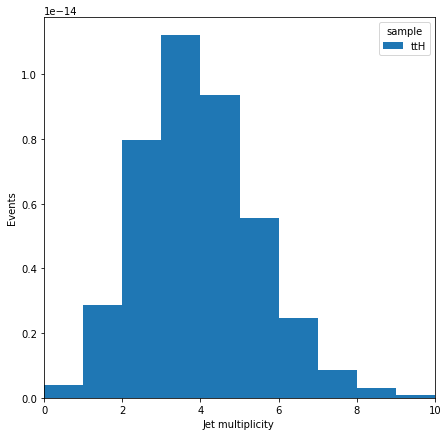

In [18]:
fig, ax = plt.subplots(1,1, figsize=(7,7)) #create an axis for plotting
hist.plot1d(h, stack=True)
#fig.show() #not needed in Jupyter, but this draws the figure in the terminal

# topcoffea.modules.HistEFT

I'll continue using the ```histos/plotsTopEFT.pkl.gz``` file from above<br>
Now we'll use methods that are unique to HistEFT (e.g. `set_wilson_coefficients()` to scale the Wilson Coefficient (WC) values)

The `HistEFT` class holds the structure constants ($S_0, S_{1j}, S_{2j},$ and $S_{3jk}$) we solved for when partins the EFT files, so the event yields are just a function of the WCs ($\vec{c}$):

\begin{equation}
N\left(\dfrac{\vec{c}}{\Lambda^2}\right) = S_0 + \sum_j S_{1j} \frac{c_j}{\Lambda^2} + \sum_j S_{2j} \frac{c_j^2}{\Lambda^4} + \sum_{j,k} S_{3jk} \frac{c_j}{\Lambda^2} \frac{c_k}{\Lambda^2}
\end{equation}

First, we'll scale the histogram to the SM (all `WCs=0`)

In [19]:
h.set_wilson_coefficients(np.zeros(h._nwc))

where `_nwc` is a local variable inside a HistEFT that stores how many WCs it contains<br>
The WCs are used whenever `values()` method is called

In [20]:
h.values()

{('ttH',): array([3.94147004e-16, 2.88450906e-15, 7.97709899e-15, 1.12077668e-14,
        9.35105127e-15, 5.55132421e-15, 2.46262553e-15, 8.56917869e-16,
        2.87937201e-16, 7.80898042e-17])}

Plotting this should look the same as before, since by default the WCs are 0

<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

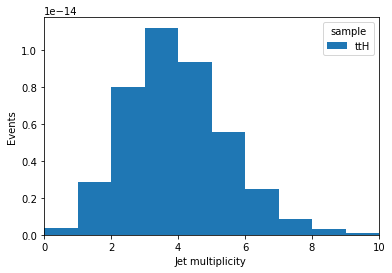

In [21]:
hist.plot1d(h, stack=True)

Now let's set them all to 1 to see that things change

In [22]:
h.set_wilson_coefficients(np.ones(h._nwc))

In [23]:
h.values()

{('ttH',): array([1.09232402e-15, 8.51339653e-15, 2.57080448e-14, 3.86785878e-14,
        3.49781061e-14, 2.23530360e-14, 1.06381268e-14, 3.98637881e-15,
        1.39593661e-15, 3.95476164e-16])}

<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

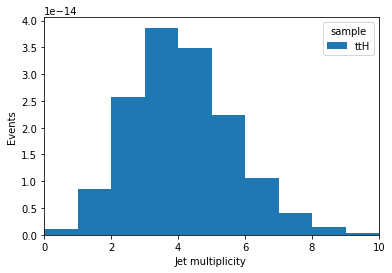

In [24]:
hist.plot1d(h, stack=True)

You might have noticed these plots are not giving event yields.<br>
The EFT samples come normalized to $\sigma * w_{\mathrm{gen}}$<br>
In order to produce event yeilds, we must scale them by $\frac{\mathcal{L}}{\sum{w_{\mathrm{event}}^{\mathrm{SM}}}}$ , where $\sum{w_{\mathrm{event}}^{\mathrm{SM}}}$ is the sum of the event weights, evaluated at the SM.

First, load the `SumOfEFTweights` histogram

In [25]:
sow = hists['SumOfEFTweights'] #get histogram with sum of EFT weights

Next, set the WCs to the SM values of 0

In [26]:
sow.set_wilson_coefficients(np.zeros(sow._nwc)) #set to SM

Now sum over all the samples

In [27]:
sow = sow.sum('sample')

Finally, get the stored value

In [28]:
smsow = sow.values()[()][0]
print('Sum of EFT weights', smsow)

Sum of EFT weights 0.0004306433039195104


Now we can scale the desired histogram by $\frac{\mathcal{L}}{\sum{w_{\mathrm{event}}^{\mathrm{SM}}}}$

In [29]:
wgt = 1000*59.7/smsow
print('Scaling by', wgt)
h.scale(wgt) #2018 lumi of 59.7 fb^-1

Scaling by 138629811.3929533


<AxesSubplot:xlabel='Jet multiplicity ', ylabel='Events'>

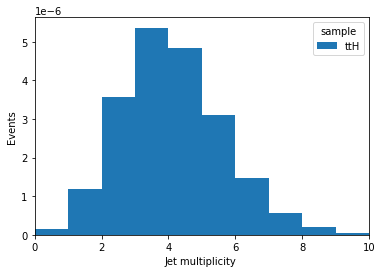

In [30]:
hist.plot1d(h, stack=True)